![Banner](img/banner.png)

# **Actividad N°1:** Vectores y valores propios

***Matemáticas para Machine Learning***.

**Semana 2 - Lección 1:** Vectores y valores propios.

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *Sergio David Salazar Isairias*

# Introducción

## Descripción



El presente *jupyter notebook* contine todo el material para el desarrollo del taller 1 de la semana 2 del curso ***Matemáticas para Machine Learning***, correspondiente a la lección 1: Vectores y valores propios. En este se utilizará el conocimiento adquirido sobre valores y vectores propios para analizar la evolución de un sistema dinámico en el tiempo.

**Objetivos de Aprendizaje:**

*   Definir la operación *potencia de una matriz* a partir de sus valores y vectores propios.
*   Calcular la función *exponencial de una matriz* por medio de valores y vectores propios.
*   Implementar un algoritmo que permita entender la evolución de un sistema dinámico.

## Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o esten solo igualadas a None, complete la asignación).

# Teoría

## Diagonalización

El proceso de diagonalización de una matriz es una herramienta algebraica de gran utilidad, solución de sistemas de ecuaciones diferenciales, estudios de dinámicas poblacionales y análisis de estado estable de sistemas dinámicos, son algunas de las aplicaciones de dicha herramienta.

¿Qué es diagonalizar una matriz? Se dice que una matriz cuadrada $A$ es diagonalizable si y solo si existe una matriz no singular $P$ (cuadrada y con determinante diferente de cero) y una matriz diagonal $D$ tal que $A=PDP^{-1}$. Por lo que diagonalizar una matriz $A$ es el procedimiento que permite hallar $P$ y $D$. 

Ahora bien, el proceso de diagonalización esta estrictamente ligado con los conceptos de valor y vector propio. Lo anterior se debe a que la matriz diagonal $D$ contiene ceros en las entradas diferentes de la diagonal principal y en la diagonal principal contiene los valores propios de $A$. Por su parte, la matriz $P$ tiene como vectores columna a los vectores de la base del espacio propio de cada valor propio. Cabe mencionar que no todas las matrices son diagonalizables, la clasificación *diagonalizable* se determina por medio de una serie de condiciones sobre las multiplicidades de los valores y vectores propios, en lo cual no se profundizara.

Si esta interesado revise el siguiente enlace:https://yutsumura.com/how-to-diagonalize-a-matrix-step-by-step-explanation/

## Potencia de una matriz

La función potencia es una función que puede representarse de la siguiente forma.
\begin{equation*}
    f(x) = kx^{p}
\end{equation*}

Donde $k$ se conoce como coeficiente, $x$ como la base y $p$ como el exponente. Note que la definición es independiente de la naturaleza de $x$. Dada una función *y(t)*, ya sea polinomica, trigonometrica, exponencial, etc, es posible definir una función potencia a partir de esta, de la forma $f(x) = ky(t)^{p}$. De igual forma, la función potencia puede tener como dominio el espacio vectorial de matrices cuadradas $\mathbf{M}_{n\times n}$. De modo que se define la función *potencia* de una matriz.

**Ejemplo**\
Sea $A$ una matriz cuadrada de  $\mathbf{M}_{3\times 3}$
\begin{equation*}
    A = 
    \begin{bmatrix}2&2&0\\0&2&3\\0&0&1\\\end{bmatrix}
\end{equation*}

La función cuadrado o segunda potencia ($k=1$,$p=2$) se calcula de la siguiente forma.
\begin{equation*}
    A^{2} =\begin{bmatrix}2&2&0\\0&2&3\\0&0&1\\\end{bmatrix}\begin{bmatrix}2&2&0\\0&2&3\\0&0&1\\\end{bmatrix}
    = \begin{bmatrix}4&8&6\\ 0&4&9\\ 0&0&1\end{bmatrix}
\end{equation*}


Es decir, sea $A \in \mathbf{M}_{n\times n}$ la potencia n-ésima se calcula como $\underbrace{A \times A \times \dots A \times A}_\text{n productos}$.


Ahora bien, la potencia de matrices es una operación que tiene un alto consumo de recursos informaticos. Por ejemplo, para calcular la segunda potencia de una matriz de $\mathbf{M}_{n\times n}$ se realizan $n^2$ productos internos. De modo que para dimensiones altas ($n$'s grandes) el consumo de recursos es alto, a lo cual se le puede agregar una disminución en la precisión de las operaciones. Es decir, calcular la potencia de una matriz a partir de su definición no es óptimo.

Es en dicho escenario en que la clasificación *ser diagonalizable* es de gran utilidad. Sea $A$ una matriz diagonalizable, existe una matriz $P$ y una matriz diagonal $\mathbf{D}$ tal que: $A = PDP^{-1}$. Ahora, calculese la n-ésima potencia de $A$.

\begin{align*}
    A^n &= (PDP^{-1})^{n}\\
    A^n &= \underbrace{(PDP^{-1})(PDP^{-1}) \dots (PDP^{-1})}_\text{n veces}\\
    A^n &= PD(P^{-1}P)\dots (P^{-1} P)DP^{-1}\\
    A^n &= P\underbrace{D\times D \dots \times D}_{n  veces}P^{-1}\\
    A^n &= PD^{n}P^{-1}
\end{align*}

donde $D^{n}$ es igual a calcular la n-ésima potencia de cada elemento de $D$. Es decir, para calcular la potencia n-ésima de $A$ solo es necesario conocer $P$ y $D$.

## Exponencial de una matriz

La exponencial de una matriz calcula de la siguiente forma.

\begin{equation*}
    e^{At} = \sum_{k=0}^{\infty} \frac{t^{k}}{k!}A^{k}
\end{equation*}

Ahora bien, si $A$ es diagonalizable la exponencial de A se calcula de la siguiente forma.

\begin{align*}
     e^{At} &= \sum_{k=0}^{\infty} \frac{t^{k}}{k!}(PDP^{-1})^{k}\\
     e^{At} &= \sum_{k=0}^{\infty} \frac{t^{k}}{k!}PD^{k}P^{-1}\\
     e^{At} &= P\left(\sum_{k=0}^{\infty} \frac{t^{k}}{k!}D^{k}\right)P^{-1}\\
     e^{At} &= Pe^{Dt}P^{-1}\\
\end{align*}

donde $e^{Dt}$ es la matriz resultante de calcular la exponencial de los elementos de su diagonal.


### Aplicación de la operación exponencial

En ingeniería un sistema dinámico es una colección de variables que evoluciona respecto a una variable independiente, por lo general respecto al tiempo. Dada su importancia en diversos contextos se desarrollaron conceptos entorno a la noción de sistema dinámico. La idea más relevante es la noción de **variable de estado**, la cual es una variable que permite describir una condición o característica del sistema. Ahora bien, dadas las dinámicas de un sistema es posible realizar una formulación matemática de este, por lo general por medio de sistemas de ecuaciones diferenciales, cuya solución tiene la siguiente forma.

\begin{equation*}
    \pi_{t} = \pi_{0}e^{Qt}
\end{equation*}

donde $\pi_{0}$ es el vector de condiciones iniciales del sistema, $\pi_{t}$ es el vector de estados en el tiempo $t$ y $Q$ la matriz de transición (captura las dinámicas del sistema). *Nota: La solución presentada solo es válida para sistemas con determinadas características, en lo cual no se profundizara.*

Entonces, para analizar un sistema dinámico se debe conocer:
*   La dinámica del sistema
*   Estado inicial
*   Intervalo de tiempo de interés

#### Ejemplo

Una empresa de patinetas esta interesada en conocer la probabilidad de que una patineta pueda ser alquilada dada una carga inicial. Para que esta pueda ser alquilada su carga debe ser de mínimo $70\%$. Ahora bien, un grupo consultor identifico la dinámica de carga y descarga de una patineta, además, que la probabilidad de poder ser alquilada se puede calcular por medio de la ecuación $\pi_{t} = \pi_{0}e^{Qt}$. Por lo que utilizando la operación **Exponencial de una matriz** realizó el siguiente grafico.

![dot-product-example.png](img/example_steady_probs.png)

En el gráfico anterior se observa que en $25$ horas ($1500$ minutos) la patineta tiene aproximadamente $12\%$ de probabilidad de poder ser alquilada dado que su carga inicial fue de $0\%$.

En partes posteriores del presente taller se utilizara la operación **Exponencial de una matriz** para analizar sistemas como aquel del ejemplo anterior.

## Inicialización

Se importan librerías básicas para el desarrollo del taller

In [1]:
# Librerias Básicas
from sympy import *

import numpy as np
import scipy
import math
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

from maiaUtils import *
from mtr import manipulate_ipython

In [2]:
# Ocultar seguimiento de debugging
if "toggle_traceback" not in globals():
    ipython = get_ipython()
    toggle_traceback = manipulate_ipython(ipython)

In [3]:
toggle_traceback()

En Python se pueden realizar operaciones matriciales por medio de la clase de dato *array*. No obstante, la libreria *sympy* provee la clase *Matrix* la cual provee un objeto con las operaciones definidas para matrices, entre estas **diagonalizar.**

Declarar una matriz por medio de la clase *Matrix* de *sympy*.

In [4]:
# crear el objeto de clase Matrix
M = Matrix([[1,-3,3],[3,-5,3],[6,-6,4]])

#display del objeto
display(M) 

Matrix([
[1, -3, 3],
[3, -5, 3],
[6, -6, 4]])

In [5]:
type(M)

sympy.matrices.dense.MutableDenseMatrix

*Sympy* tiene las funciones *eigenvals()* y *eigenvects()* que calculan los valores y vectores propios de una matriz cuadrada, respectivamente.

In [6]:
# retorna un diccionario cuyas llaves son los valores propios, el elemento de cada llave es la multiplicidad algebraica
M.eigenvals() 

{4: 1, -2: 2}

In [7]:
# retorna tuplas con los vectores propios asociados a cada valor propio
A,B=M.eigenvects()

In [8]:
B[2]

[Matrix([
 [1/2],
 [1/2],
 [  1]])]

Utilizar la función diagonalize() para halla la matriz diagonal D y la matriz no singular P.

In [9]:
P, D = M.diagonalize()  
print(f'La matriz de cambio de base P es: {P}')
print(f'La matriz diagonal D es: {D}')

La matriz de cambio de base P es: Matrix([[1, -1, 1], [1, 0, 1], [0, 1, 2]])
La matriz diagonal D es: Matrix([[-2, 0, 0], [0, -2, 0], [0, 0, 4]])


¿Qué sucede si M no es diagonalizable?

In [10]:
M = Matrix([[-3,2],[-2,1]]) # no es diagonalizable
try:
    P, D = M.diagonalize() 
except Exception as e:
    print(str(e))

Matrix is not diagonalizable


# Problemas

Para los problemas puede utilizar las funciones previamente mostradas. Si tiene dudas sobre su implementación revise la documentación de *Sympy* en: https://docs.sympy.org/latest/modules/matrices/matrices.html
    

## a) Potencia de una matriz

Implemente una función en Python que reciba como parámetros una matriz $\mathbf{A}$ y un entero $n$, de tal manera que retorne la potencia n-ésima de la matriz $A$.

In [11]:
def potencia_matriz(A:list,n:int):
    """
    Calcula la potencia n-esima de la matriz A
    ___________________________________
    Entrada:
    A: [list] Lista que contiene las filas de A. A es diagonalizable.
    n: [int] Potencia a calcular.
    ___________________________________
    Salida:
    An: [list] Lista con las filas resultantes de calcular la potencia n-esima de la matriz A.
    """
    A_n = Matrix(A)
    # =====================================================
    # COMPLETAR ===========================================
    # =====================================================
    
    # HINT: piense en la descomposición de A por medio de 
    # - 2 matrices de cambio de base y una matriz diagonal.
    try:
        P, D = A_n.diagonalize()
        Dn = D**n
        P_1 = P.inv()
        A_n = P*Dn*P_1
    except Exception as e:
        print(str(e))
    # =====================================================
    # Convierte A_n en estructura de lista
    A_n = A_n.tolist()
    return A_n

In [12]:
l = [[1,2],[1,0]]
potencia_matriz(A=l,n=2)

[[3, 2], [1, 2]]

In [13]:
A=[[-12.0, -0.0, 0.0], [-0.0, -180.0, -0.0], [0.0, -0.0, 25.0]]
potencia_matriz(A=A,n=2)

[[144.000000000000, 0, 0], [0, 32400.0000000000, 0], [0, 0, 625.000000000000]]

## b) Exponencial de una matriz

Implemente una función en Python que reciba como parámetros una matriz $\mathbf{A}$ y un tiempo $\mathbf{t}$, de tal manera que retorne la exponencial de la matriz evaluada en el tiempo $\mathbf{t}$. Además, considere un parámetro *d_int* el cual índica la precisión decimal que tenga la salida de la función, por defecto la salida debe tener precisión de 3 decimales. Para calcular la exponcial de una constante puede apoyarse en la función *exp()* de la libreria *math*. 

In [14]:
def exponencial_matriz(A:list,t:float,d_int=3):
    """
    Calcula la exponencial de la matriz A
    ___________________________________
    Entrada:    Entrada:
    A: [list] Lista que contiene las filas de A. A es diagonalizable.
    t: [int] Tiempo en el cual se calcula la función exponencial.
    ___________________________________
    Salida:
    expA: [list] Lista con las filas resultantes de calcular la exponcial de la matriz A.
    """
    expA = Matrix(A)
    
    # DESCOMPONER A POR MEDIO DE DIAGONALIZACIÓN.
    # COMPLETAR ===========================================
    #P,D = [],[]
    P, D = expA.diagonalize()  
    # =====================================================
    
    # Declarar la variable que almacena la exponencial de la matriz D
    exp_D = D
    
    # CALCULAR LA EXPONENCIAL DE LA MATRIZ DIAGONAL.
    # COMPLETAR ===========================================
    d_int=3

    for i in range(sqrt(len(D))):
        # La función exponencial puede generar problemas númericos. Para evitar inconvenientes se utiliza try-except
        try:
        # Calcular la exponencial por medio de la función math.exp()
        # Redondear con precisión de 3 decimales
            #exp_D[i,i] = [round([],d_int)]
            exp_D[i,i] = round(math.exp(D[i,i]*t),d_int)
        # =====================================================
        except OverflowError:
            exp_D[i,i] = 100000
    
    
    # CALCULAR LA EXPONENCIAL DE LA MATRIZ A.
    # COMPLETAR ===========================================
    #expA = expA
    expA = P*(exp_D)*P.inv()
    # =====================================================
        
    # Transforma el dato de la clase Matrix a la estructura list
    expA = expA.tolist()
    
    # Retorna la matriz resultante de la operación exponencial
    return expA

In [15]:
A = [[1,-3,3],[3,-5,3],[6,-6,4]]
t=1
exponencial_matriz(A,t)

[[27.3665000000000, -27.2315000000000, 27.2315000000000],
 [27.2315000000000, -27.0965000000000, 27.2315000000000],
 [54.4630000000000, -54.4630000000000, 54.5980000000000]]

## c) Evolución de un sistema dinámico

In [16]:
def evolucion_sistema(A:list,tlim:int,x0:list):
    """
    Calcula la evolución del sistema con matriz de estados A y condición inicial x0 desde t=0 hasta tlim.
    ___________________________________
    Entrada:
    A: [list] Lista que contiene las filas de A. A es diagonalizable.
    t: [int] Tiempo en el cual se calcula la función exponencial.
    ___________________________________
    Salida:
    expA:
    """
    dict_evolucion = {}
    for i in range(len(x0)):
        dict_evolucion[i] = [x0[i]]
        
    x0 = Matrix(x0).T
    for i in range(tlim):
        expm = Matrix(exponencial_matriz(A,i))
        x_nuevo = x0*expm
            
        for j in range(len(x0)):
            dict_evolucion[j].append(float(x_nuevo[j]))
    return dict_evolucion

In [17]:
A = [[-1,1,0],[2,-5,3],[1,2,-3]]
tlim = 10
x0 = [1/2,1/2,1/3]
dict_evolucion = evolucion_sistema(A,tlim,x0)

In [18]:
df_evolucion = pd.DataFrame(dict_evolucion)
display(df_evolucion)

,0,1,2
0,0.500000,0.500000,0.333333
1,0.500000,0.500000,0.333333
2,0.771061,0.272877,0.289395
3,0.796847,0.267325,0.269162
4,0.799737,0.266722,0.266875
5,0.800000,0.266667,0.266667
6,0.800000,0.266667,0.266667
7,0.800000,0.266667,0.266667
8,0.800000,0.266667,0.266667
9,0.800000,0.266667,0.266667


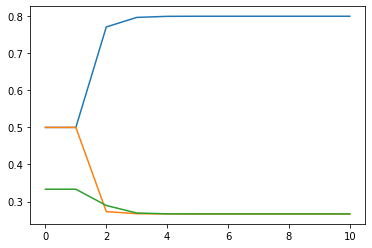

In [19]:
plt.plot(df_evolucion[0])
plt.plot(df_evolucion[1])
plt.plot(df_evolucion[2])
plt.show()

Definir la matriz que contiene las dinámicas del sistema

In [20]:
df = pd.read_csv("dataset/matriz_exponencial.csv")
del(df["Unnamed: 0"])
df.head()

,"0%,C","10%,C","20%,C","30%,C","40%,C","50%,C","60%,C","70%,C","80%,C","90%,C","100%,C","70%,U","80%,U","90%,U","100%,U"
0,0.207251,0.049976,0.062588,0.077353,0.094414,0.118417,0.159419,0.077422,0.034599,0.014958,0.000794,0.062296,0.027839,0.012035,0.000639
1,0.203554,0.049686,0.062574,0.077551,0.094813,0.119060,0.160463,0.077962,0.034857,0.015078,0.000801,0.062759,0.028060,0.012138,0.000645
2,0.203738,0.049700,0.062574,0.077541,0.094793,0.119029,0.160411,0.077936,0.034844,0.015072,0.000800,0.062736,0.028049,0.012133,0.000644
3,0.203849,0.049709,0.062575,0.077535,0.094781,0.119009,0.160380,0.077919,0.034836,0.015069,0.000800,0.062722,0.028042,0.012130,0.000644
4,0.203931,0.049715,0.062575,0.077530,0.094772,0.118995,0.160357,0.077907,0.034830,0.015066,0.000800,0.062712,0.028037,0.012128,0.000644


Definir el vector de condiciones iniciales del sistema.

In [21]:
pi_zero = [0]*df.shape[1]
pi_zero[0] = 1
pi_zero

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Calcular vector de estados en $t=1500$.

In [22]:
matriz_exponencial = df.to_numpy()
pi_t = matriz_exponencial@np.array(pi_zero)
pi_t

array([0.20725119, 0.20355413, 0.20373753, 0.20384889, 0.2039311 ,
       0.20399902, 0.20406083, 0.20412143, 0.20407193, 0.20404522,
       0.20405317, 0.20419221, 0.20412794, 0.20409077, 0.20409853])

In [23]:
list_probs =[]
for i in range(7):
    pi_zero = [0]*matriz_exponencial.shape[1]
    pi_zero[i] = 1
    
    # =====================================================
    # COMPLETAR ===========================================
    # cambie [] por la expresión correcta para hallar pi_t
    # note que pi_t depende de pi_zero
    matriz_exponencial = df.to_numpy()
    pi_t = matriz_exponencial@np.array(pi_zero)
    # =====================================================
    
    sp = np.round(sum(pi_t[8:11]),4)
    
    list_probs.append(sp)

In [24]:
list_probs

[0.6122, 0.1492, 0.1877, 0.2326, 0.2843, 0.3569, 0.481]

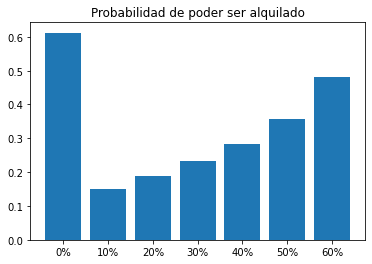

In [25]:
plt.bar(["0%","10%","20%","30%","40%","50%","60%"],list_probs)
plt.title("Probabilidad de poder ser alquilado")
plt.show()

# Calificación

In [26]:
df = generador_matrices(dim=[3,3],n=10)
df = pd.DataFrame(df)

In [27]:
sol_tentativa_power = [[potencia_matriz(df["test"][i],df["power"][i])] for i in range(len(df))]
sol_tentativa_exp = [[exponencial_matriz(df["test"][i],df["time"][i])] for i in range(len(df))]

In [28]:
calificar_potencia_matriz(sol_tentativa_power,df)

In [29]:
calificar_exponencial_matriz(sol_tentativa_exp,df)